## Project Info
- The data set contains 3 calsses of 50 instances each, Where each class refers to a type of iris plant.
- Predict the optimum number of clusters and represent it visually

## Attribute Information:
1. Sepal Length in cm
2. Sepal Width in cm
3. Petal Length in cm
4. Petal Width in cm
5. Species:
       (Iris-setosa,
       Iris-versicolor,
       Iris-virginica)

## Import necessary libraries

In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

## Load & Explore data

In [2]:
data=pd.read_csv('D:/Projects/GRIP/Iris.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
# To show basic info about datatype
data.info()
shape = data.shape
print(f'\n Number of Rows = {shape[0]}\n Number of columns = {shape[1]} ')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB

 Number of Rows = 150
 Number of columns = 6 


In [4]:
# To display stats about the data
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [5]:
# To display no. of samples on each class
data['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [6]:
# Check for null values 
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [7]:
# drop ID and Species columns
iris = data.drop(['Id','Species'],axis=1)
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## Find the optimum number of clusters for K Means

In [8]:
x = iris.iloc[:, :].values
wcss = []      # WCSS means >> Within cluster sum of squares

for i in range(1, 21):
    kmean = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 200, n_init = 15, random_state = 0)
    kmean.fit(x)
    wcss.append(kmean.inertia_)

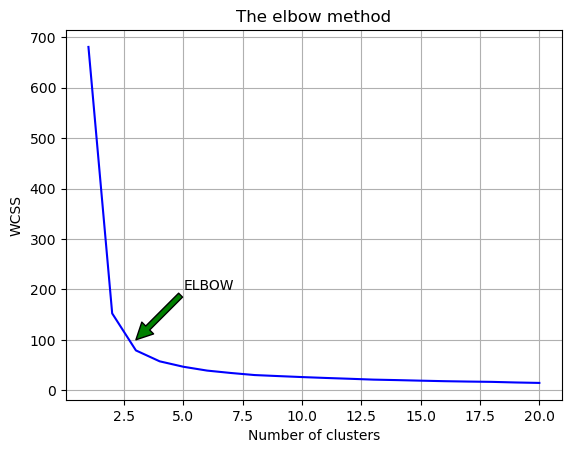

In [9]:
# Plotting the results onto a line graph, 
# `allowing us to observe 'The elbow'
plt.plot(range(1, 21), wcss, color = "blue")
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') 
plt.annotate('ELBOW',xytext=(5,200),xy=(3,100),arrowprops={'facecolor':'green'})
plt.grid()
plt.show()

- You can clearly see why it is called 'The elbow method' from the above graph, the optimum clusters is where the elbow occurs. 
- This is when the within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration.
- From this we choose the number of clusters as 3 Clusters

In [10]:
# Applying kmeans to the dataset 
kmean = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 200, n_init = 15, random_state = 0)
y = kmean.fit_predict(x)

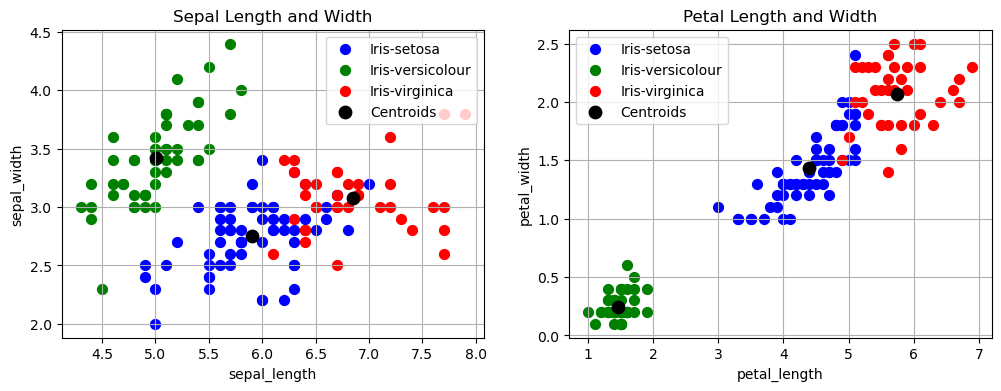

In [11]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))  

# Visualising the clusters - On the first two columns (sepal length, sepal width)
ax[0].scatter(x[y == 0, 0], x[y == 0, 1], 
               s=50, c='blue', label='Iris-setosa')
ax[0].scatter(x[y == 1, 0], x[y == 1, 1], 
               s=50, c='green', label='Iris-versicolour')
ax[0].scatter(x[y == 2, 0], x[y == 2, 1],
               s=50, c='red', label='Iris-virginica')
ax[0].scatter(kmean.cluster_centers_[:, 0], kmean.cluster_centers_[:, 1], 
               s=80, c='black', label='Centroids')
ax[0].set_xlabel('sepal_length')
ax[0].set_ylabel('sepal_width')
ax[0].set_title('Sepal Length and Width')
ax[0].grid()
ax[0].legend()

# Visualising the clusters - On the second two columns (petal length, petal width)
ax[1].scatter(x[y == 0, 2], x[y == 0, 3], 
               s=50, c='blue', label='Iris-setosa')
ax[1].scatter(x[y == 1, 2], x[y == 1, 3], 
               s=50, c='green', label='Iris-versicolour')
ax[1].scatter(x[y == 2, 2], x[y == 2, 3],
               s=50, c='red', label='Iris-virginica')
ax[1].scatter(kmean.cluster_centers_[:, 2], kmean.cluster_centers_[:, 3], 
               s=80, c='black', label='Centroids')
ax[1].set_xlabel('petal_length')
ax[1].set_ylabel('petal_width')
ax[1].set_title('Petal Length and Width')
ax[1].grid()
ax[1].legend()


plt.show()

## The Original data

In [12]:
colors = ['green', 'blue', 'red']
species = ['Iris-setosa','Iris-versicolor','Iris-virginica']

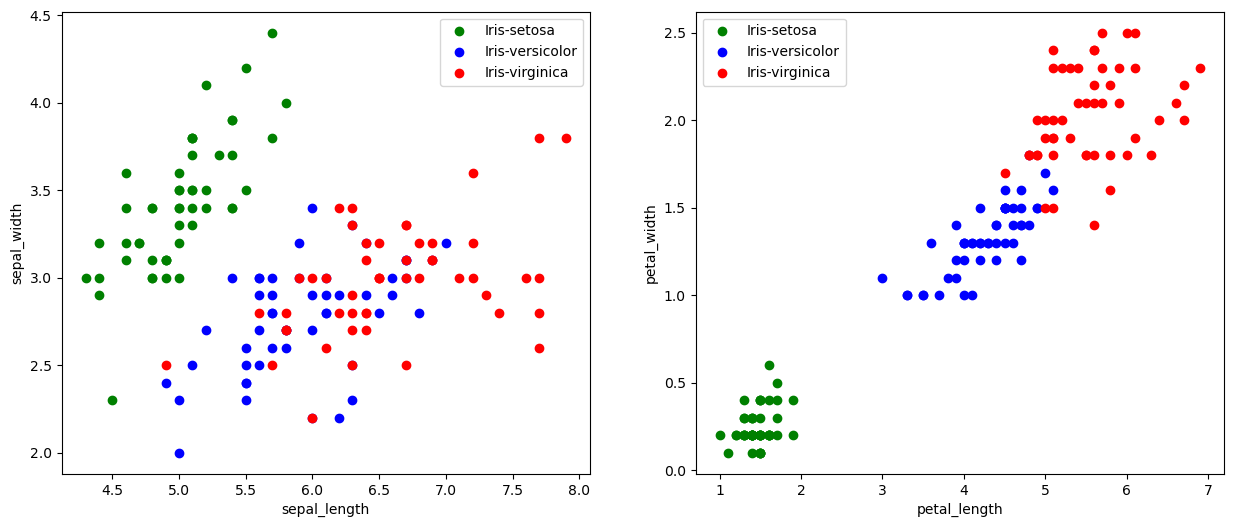

In [13]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,6))

for i in range(3):
    x_sepal = data[data['Species']==species[i]]
    ax1.scatter(x_sepal['SepalLengthCm'], x_sepal['SepalWidthCm'], c = colors[i], label = species[i])

ax1.set_xlabel('sepal_length')    
ax1.set_ylabel('sepal_width')
ax1.legend()


for i in range(3):
    x_petal = data[data['Species']==species[i]]
    ax2.scatter(x_petal['PetalLengthCm'], x_petal['PetalWidthCm'], c = colors[i], label = species[i])

ax2.set_xlabel('petal_length')    
ax2.set_ylabel('petal_width')
ax2.legend()
plt.show()

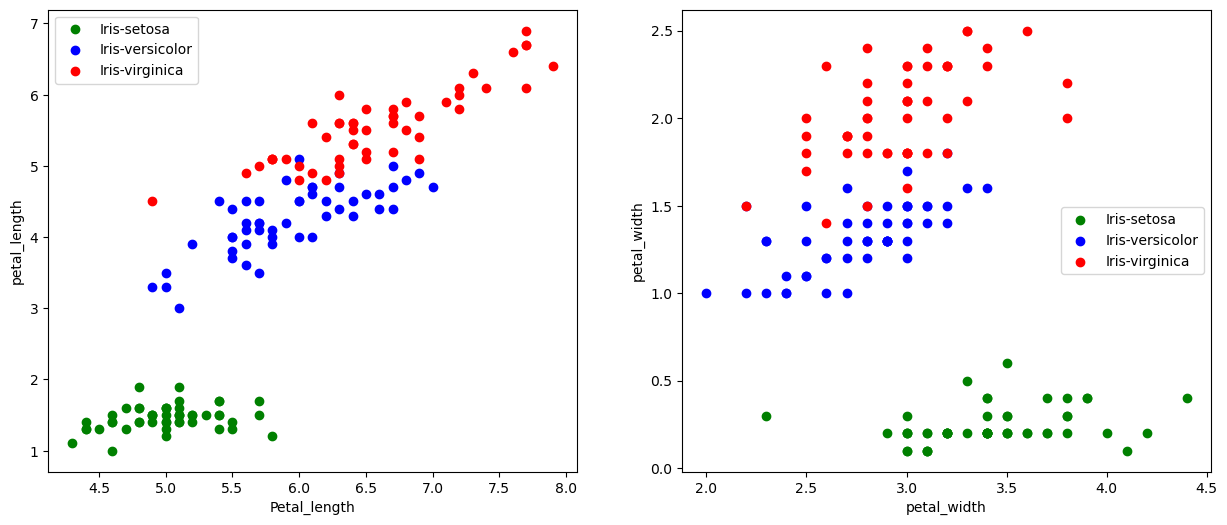

In [15]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,6))

for i in range(3):
    x = data[data['Species']==species[i]]
    ax1.scatter(x['SepalLengthCm'], x['PetalLengthCm'], c = colors[i], label = species[i])

ax1.set_xlabel('Petal_length')    
ax1.set_ylabel('petal_length')
ax1.legend()

for i in range(3):
    x = data[data['Species']==species[i]]
    ax2.scatter(x['SepalWidthCm'], x['PetalWidthCm'], c = colors[i], label = species[i])

ax2.set_xlabel('petal_width')    
ax2.set_ylabel('petal_width')
ax2.legend()
plt.show()

## Coorelation Matrix

In [16]:
data.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


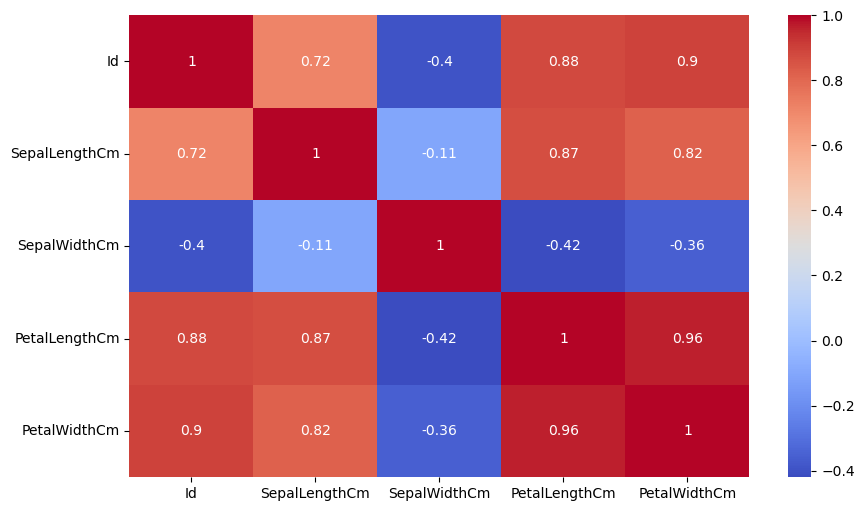

In [19]:
corr = data.corr()
fig, ax = plt.subplots(figsize=(10,6))
sns.heatmap(corr,annot=True, ax=ax, cmap ='coolwarm')
plt.show()